In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
overall_sheet = pd.read_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_inference_valence.csv", header = 0)
overall_sheet.columns = overall_sheet.columns.str.replace(" ", "_")
overall_sheet.head()

overallrt_sheet = pd.read_csv("C:/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/modified_mTurk_pavlovia_data/summary_data/overall_rt_valence.csv", header = 0)
overallrt_sheet.columns = overallrt_sheet.columns.str.replace(" ", "_")
overallrt_sheet.head()

,participant,Avg_AB1,Avg_AB2,Avg_AB3,Avg_BC,Avg_AC,Avg_ABfinal,Avg_BCfinal,Avg_AB1_emo,Avg_AB2_emo,Avg_AB3_emo,Avg_BC_emo,Avg_AC_emo,Avg_ABfinal_emo,Avg_BCfinal_emo,AB_diff,BC_diff,AB_diff_emo,BC_diff_emo
0,A0017268R9SKD8U2Y3F,1.188615,0.868461,0.638793,0.841408,1.885889,0.619498,0.781149,1.320110,0.995623,1.007748,1.096032,1.734001,0.774466,0.660652,0.019295,0.060259,0.545645,0.435381
1,A12HWPFXQPITHD,1.224767,1.069101,1.073051,1.232893,2.312490,0.746494,1.007237,1.361856,1.187676,0.882175,1.469190,1.686990,1.166472,1.067367,0.326557,0.225656,0.195384,0.401823
2,A16G6PPH1INQL8,1.334674,0.955489,1.018429,1.000255,1.669490,0.905642,0.942679,1.274957,1.118929,0.922157,0.907119,1.144061,0.916754,0.858535,0.112786,0.057576,0.358203,0.048583
3,A1C5SQZ045W0L5,1.480021,1.091421,1.035213,1.270329,2.234501,1.001373,1.070697,1.435570,1.049434,1.063797,1.466961,2.452573,1.003138,1.329537,0.033840,0.199633,0.432432,0.137424
4,A1IFIK8J49WBER,0.860240,1.182193,0.946272,0.906748,1.788186,0.837411,0.995905,1.261024,1.197826,0.882294,1.163848,1.993370,0.980994,1.059629,0.108861,0.089158,0.280030,0.104219


In [14]:
diff_df = pd.melt(overall_sheet, id_vars=['participant'], value_vars=['ABval_diff', 'AB2val_diff', 'AB3val_diff', 'Bcval_diff', 'Acval_diff','Abfinalval_diff', 'Bcfinalval_diff'], var_name='condition', value_name='Valence_diff')
diff_df

,participant,condition,Valence_diff
0,A0017268R9SKD8U2Y3F,ABval_diff,0.083333
1,A12HWPFXQPITHD,ABval_diff,0.000000
2,A16G6PPH1INQL8,ABval_diff,0.105072
3,A1C5SQZ045W0L5,ABval_diff,0.239130
4,A1IFIK8J49WBER,ABval_diff,0.017316
...,...,...,...
205,A3EHDY67QENKPT,Bcfinalval_diff,0.166667
206,A3JTDNRJYVCGQD,Bcfinalval_diff,0.125000
207,A38I0E8UK53ME5,Bcfinalval_diff,0.208333
208,A1F6MWP9A0XLJQ,Bcfinalval_diff,0.333333


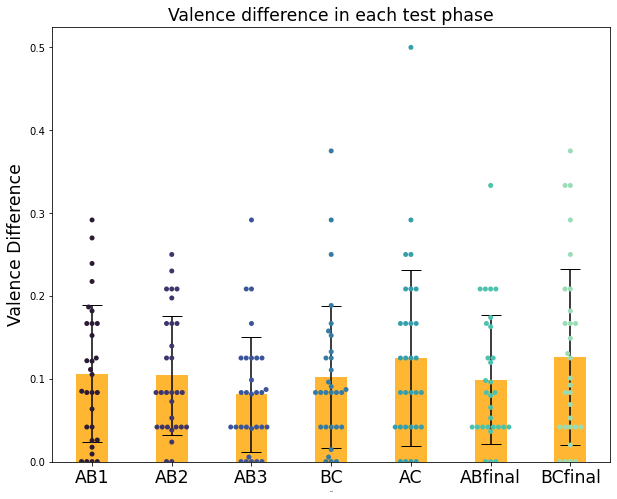

In [19]:
AB1_mean = np.mean(overall_sheet.ABval_diff)
AB2_mean = np.mean(overall_sheet.AB2val_diff)
AB3_mean = np.mean(overall_sheet.AB3val_diff)
BC_mean = np.mean(overall_sheet.Bcval_diff)
AC_mean = np.mean(overall_sheet.Acval_diff)
ABfinal_mean = np.mean(overall_sheet.Abfinalval_diff)
BCfinal_mean = np.mean(overall_sheet.Bcfinalval_diff)

AB1_std = np.std(overall_sheet.ABval_diff)
AB2_std = np.std(overall_sheet.AB2val_diff)
AB3_std = np.std(overall_sheet.AB3val_diff)
BC_std = np.std(overall_sheet.Bcval_diff)
AC_std = np.std(overall_sheet.Acval_diff)
ABfinal_std = np.std(overall_sheet.Abfinalval_diff)
BCfinal_std = np.std(overall_sheet.Bcfinalval_diff)

# Define labels, positions, bar heights and error bar heights
labels = ['AB1', 'AB2', 'AB3', 'BC', 'AC', 'ABfinal', 'BCfinal']
x_pos = np.arange(len(labels))
CTEs = [AB1_mean, AB2_mean, AB3_mean, BC_mean, AC_mean, ABfinal_mean, BCfinal_mean]
error = [AB1_std, AB2_std, AB3_std, BC_std, AC_std, ABfinal_std, BCfinal_std]

# Build the plot
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(data=diff_df, y = 'Valence_diff', x = 'condition', palette = 'mako', ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='orange',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Valence Difference', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Valence difference in each test phase', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

In [27]:
diffrt_df = pd.melt(overallrt_sheet, id_vars=['participant'], value_vars=['AB_diff', 'BC_diff', 'AB_diff_emo', 'BC_diff_emo'], var_name='condition', value_name='mean_rt')
diffrt_df

diffrt_df.loc[diffrt_df['condition'] == 'AB_diff', 'valence'] = 'c-neutral'
diffrt_df.loc[diffrt_df['condition'] == 'BC_diff', 'valence'] = 'c-neutral'


diffrt_df.loc[diffrt_df['condition'] == 'AB_diff_emo', 'valence'] = 'fearful'
diffrt_df.loc[diffrt_df['condition'] == 'BC_diff_emo', 'valence'] = 'fearful'


diffrt_df.loc[diffrt_df['condition'] == 'AB_diff', 'Test'] = 'AB'
diffrt_df.loc[diffrt_df['condition'] == 'BC_diff', 'Test'] = 'BC'

diffrt_df.loc[diffrt_df['condition'] == 'AB_diff_emo', 'Test'] = 'AB'
diffrt_df.loc[diffrt_df['condition'] == 'BC_diff_emo', 'Test'] = 'BC'

In [28]:
diffrt_df

,participant,condition,mean_rt,valence,Test
0,A0017268R9SKD8U2Y3F,AB_diff,0.019295,c-neutral,AB
1,A12HWPFXQPITHD,AB_diff,0.326557,c-neutral,AB
2,A16G6PPH1INQL8,AB_diff,0.112786,c-neutral,AB
3,A1C5SQZ045W0L5,AB_diff,0.033840,c-neutral,AB
4,A1IFIK8J49WBER,AB_diff,0.108861,c-neutral,AB
...,...,...,...,...,...
115,A3EHDY67QENKPT,BC_diff_emo,0.180612,fearful,BC
116,A3JTDNRJYVCGQD,BC_diff_emo,0.303775,fearful,BC
117,A38I0E8UK53ME5,BC_diff_emo,0.033277,fearful,BC
118,A1F6MWP9A0XLJQ,BC_diff_emo,0.020942,fearful,BC


Text(0, 0.5, 'Response Time difference (s)')

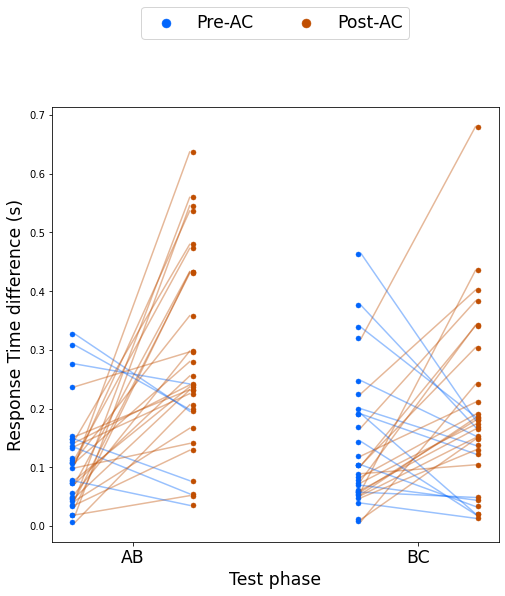

In [36]:
#check for interference
#here if there is a difference between pre and post AC test, it will be indicated by different colors. 
#If pre AC performance is better than the post AC performance, line is blue, otherwise red!
#note that if there is no difference, i.e, if pre-post = 0, the line is still red!
red = '#c04e01'
blue = '#0165fc'
fig, ax = plt.subplots(figsize=(8, 8))

# Set up list to track sites
valences = []

i = 1.0
for valence, subdf in diffrt_df.groupby('Test'):
    valences.append(valence)
    # Get the values for healthy and disease patients
    h = subdf.query('valence == "c-neutral"')['mean_rt'].values
    d = subdf.query('valence == "fearful"')['mean_rt'].values
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
 # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]
    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)
    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)
 # Plot the points
 # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue,
    s=25, lw=0.5, label='Pre-AC')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
    s=25, lw=0.5, label='Post-AC')
 # Update x-axis
    i += 1
# Fix the axes and labels
ax.set_xticks([1, 2])
_ = ax.set_xticklabels(valences, fontsize='xx-large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
    fontsize='xx-large',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test phase', fontsize = 'xx-large')
ax.set_ylabel('Response Time difference (s)', fontsize = 'xx-large')
    #fig.savefig('mean_bias_context_age_source_corr_points.pdf')